### 1. Problem :  

##### site web https://www.kaggle.com/datasets/piyushborhade/knn-algorithms?select=iphone_purchase_records.csv

### Import libraries

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix




### 2. Loading data

In [26]:
df = pd.read_csv('iphone_purchase_records.csv')


### 3. Data exploration

In [27]:
print(df.shape)
df.head()

(400, 4)


,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [29]:
df.notnull().sum()

Gender             400
Age                400
Salary             400
Purchase Iphone    400
dtype: int64

In [30]:
print(df['Gender'].value_counts())

Gender
Female    204
Male      196
Name: count, dtype: int64


### 4. Data visualization

In [31]:
# Visualiser les valeurs de la variable ciblée

df['Purchase Iphone'].value_counts()

Purchase Iphone
0    257
1    143
Name: count, dtype: int64

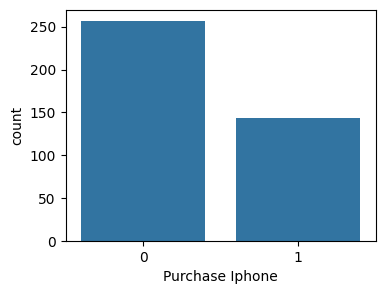

In [32]:
# 
plt.figure(figsize=(4,3))
sns.countplot(x='Purchase Iphone',data=df)
plt.show()

<Figure size 800x600 with 0 Axes>

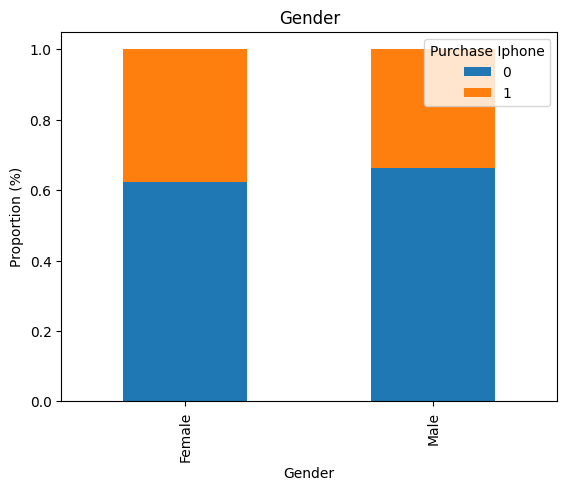

In [33]:
# Générer un bar plot pour la variable catégorielle
cat_var= 'Gender'

plt.figure(figsize = (8, 6))
(df.groupby([cat_var, 'Purchase Iphone'])['Purchase Iphone'].count()/df.groupby([cat_var])[cat_var].count()).unstack(level=1).plot(kind='bar', stacked=True)
plt.title(cat_var)
plt.xlabel('Gender')
plt.ylabel('Proportion (%)')
#plt.legend(['Non Purchased', 'Purchased'])
plt.legend
plt.show()
#print(df.groupby([cat_var, 'Purchase Iphone'])['Purchase Iphone'].count())
#print('====')
#print(df.groupby([cat_var])[cat_var].count())

In [34]:
# Label encoding 
#labelencoder = LabelEncoder()
#df['Gender'] = labelencoder.fit_transform(df['Gender'])
#print(df['Gender'].value_counts())
df=df['Gender'].map({'Female':0,'Male':1})
df.value_counts()

# One-Hot encoding pour la colonne 'Gender'

#one_hot_colonnes = pd.get_dummies(df['Gender'],dtype=int)
#df = pd. concat([df,one_hot_colonnes], axis=1)
#df = df.drop(['Gender'],axis=1)

Gender
0    204
1    196
Name: count, dtype: int64

In [35]:
#df.columns.tolist()

In [36]:
# Génerer un box plot pour chaque variable numérique

num_vars = ['Age','Salary']

plt.figure(figsize=(5,5))
for var in num_vars:
    sns.boxplot(x='Purchase Iphone',y=var,data=df)
    plt.title(var)
    plt.xlabel('Purchase Iphone')
    plt.ylabel('Valeur')
    plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 500x500 with 0 Axes>

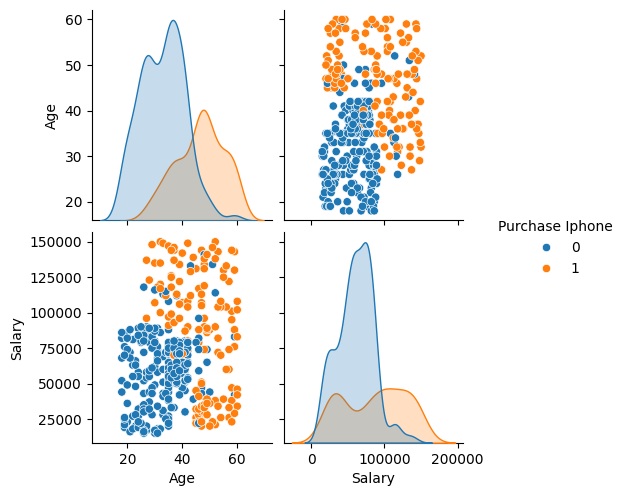

In [ ]:
sns.pairplot(df, hue = 'Purchase Iphone')

### 5. Data splitting

In [ ]:
X = df.drop('Purchase Iphone', axis = 1)
y = df['Purchase Iphone']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [ ]:
# normalisation des données
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'Male'

### 6. Model training

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
# j'ai choisi k=3 en accord avec l'analyse de méthode elbow, que j'appliquerai après
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
full_test = pd.concat([X_test, y_test], axis=1)
full_test.shape

(80, 5)

### 7. Model evaluation

In [ ]:
# Prédictions

y_pred = knn_model.predict(scaled_X_test)
print(y_pred.shape)
y_pred[:10]

(80,)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
# Accuracy

accuracy_score(y_test, y_pred)

0.95

In [ ]:
# Matrice de confusion

print(confusion_matrix(y_test, y_pred))

[[55  3]
 [ 1 21]]


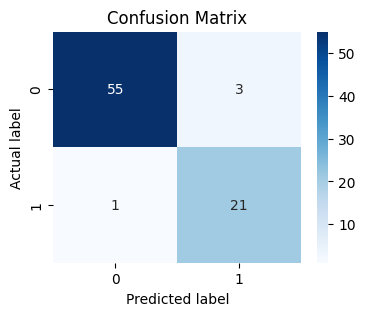

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# En (0,0), le modéle prédit correctement que 54 iPhone ne sont pas achetés
# En (1,1), il prédit correctement que 20 iphone sont achetés
# En (0,1), il prédit incorrectement que 4 iphone sont achetés
# En (1,0), il prédit incorrectement que 2 iphone ne sont pas achetés

In [ ]:
# Performance d'un modèle

print(classification_report(y_test,y_pred))

# Precision :
# For y=0, true negatives / (true negatives + false negatives)
# For y=1, true positives / (true positives + false positives)

# Recall : 
# For y=0, true negatives / (true negatives + false positives)
# For y=1, true positives / (true positives + false negatives)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [ ]:
# 

### 8. Méthode Elbow pour choisir des valeurs de K raisonnables

In [ ]:
test_error_rates = []

for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)

test_error_rates

[0.07499999999999996,
 0.07499999999999996,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044]

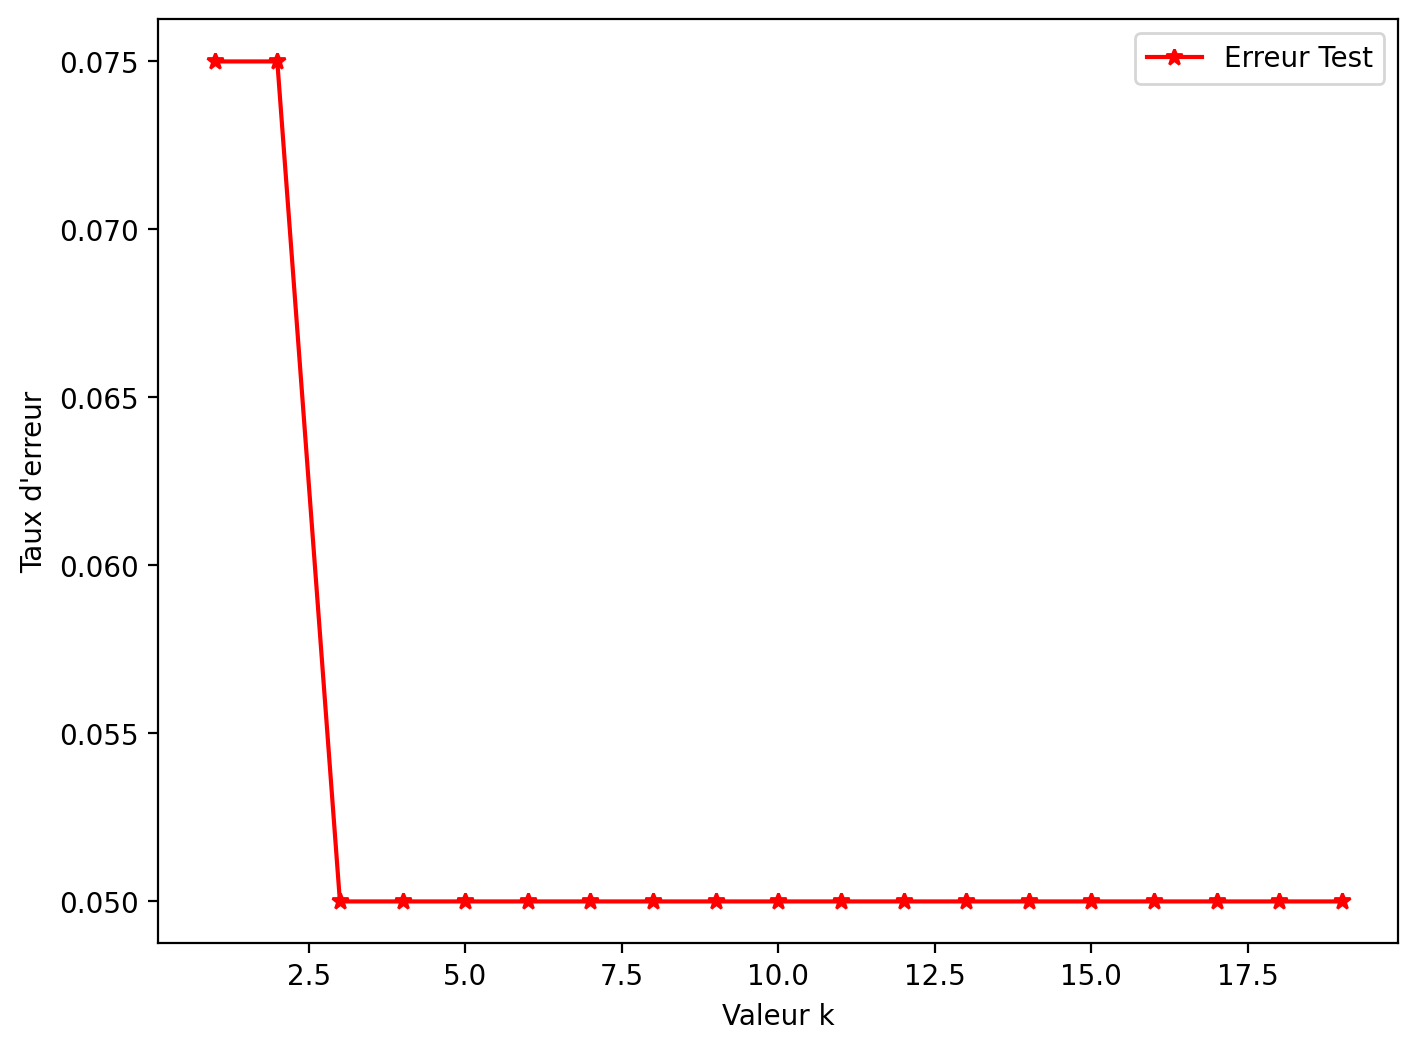

In [ ]:
# 
plt.figure(figsize=(8,6),dpi=200)
plt.plot(range(1,20), test_error_rates, label='Erreur Test', marker='*',color='red')
plt.legend()
plt.ylabel("Taux d'erreur")
plt.xlabel("Valeur k");